In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cotton-disease-dataset/Cotton Disease/val/fresh cotton plant/dsd (257)_iaip.jpg
/kaggle/input/cotton-disease-dataset/Cotton Disease/val/fresh cotton plant/dsd (396)_iaip.jpg
/kaggle/input/cotton-disease-dataset/Cotton Disease/val/fresh cotton plant/dsd (313)_iaip.jpg
/kaggle/input/cotton-disease-dataset/Cotton Disease/val/fresh cotton plant/dsd (168)_iaip.jpg
/kaggle/input/cotton-disease-dataset/Cotton Disease/val/fresh cotton plant/dsd (386)_iaip.jpg
/kaggle/input/cotton-disease-dataset/Cotton Disease/val/fresh cotton plant/dsd (543)_iaip.jpg
/kaggle/input/cotton-disease-dataset/Cotton Disease/val/fresh cotton plant/dsd (152)_iaip.jpg
/kaggle/input/cotton-disease-dataset/Cotton Disease/val/fresh cotton plant/dsd (200)_iaip.jpg
/kaggle/input/cotton-disease-dataset/Cotton Disease/val/fresh cotton plant/dsd (204)_iaip.jpg
/kaggle/input/cotton-disease-dataset/Cotton Disease/val/fresh cotton plant/dsd (142)_iaip.jpg
/kaggle/input/cotton-disease-dataset/Cotton Disease/val/fres

In [2]:
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
import matplotlib.pyplot as plt

In [3]:
train_data_path = '../input/cotton-disease-dataset/Cotton Disease/train'
test_data_path = '../input/cotton-disease-dataset/Cotton Disease/test'

In [4]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20, 20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

In [5]:
training_datagen = ImageDataGenerator(rescale=1./255,
                                      rotation_range=40,
                                      width_shift_range=0.2,
                                      height_shift_range=0.2,
                                      shear_range=0.2,
                                      zoom_range=0.2,
                                      horizontal_flip=True,
                                      fill_mode='nearest')

In [6]:
training_data = training_datagen.flow_from_directory(train_data_path, 
                                      target_size=(150, 150), 
                                      batch_size=32,
                                      class_mode='categorical')

Found 1951 images belonging to 4 classes.


In [7]:
test_datagen = ImageDataGenerator(rescale =1./255)

In [8]:
test_data = test_datagen.flow_from_directory(test_data_path,
                                  target_size=(150,150),
                                  batch_size=32,
                                  class_mode='categorical')

Found 106 images belonging to 4 classes.


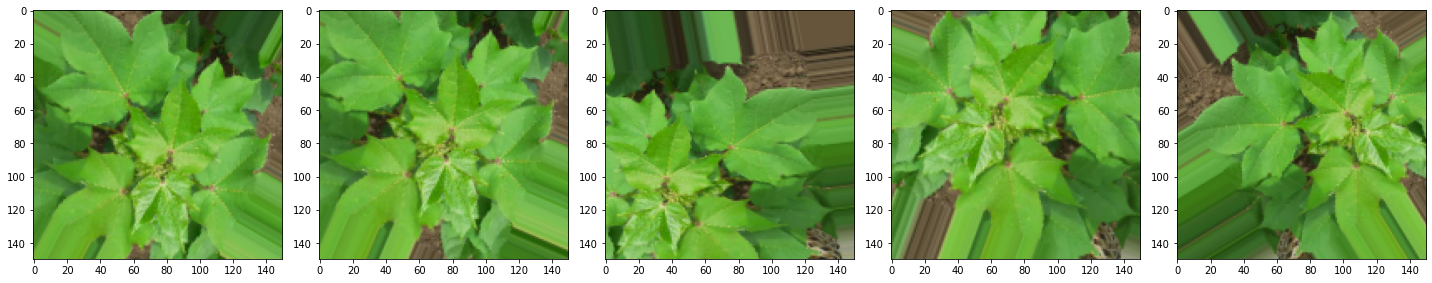

In [9]:
images = [training_data[0][0][0] for i in range(5)]
plotImages(images)

In [10]:
model = keras.models.Sequential([
                                    keras.layers.Conv2D(filters=32, kernel_size=3, input_shape=[150, 150, 3]),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),
                                    keras.layers.Conv2D(filters=64, kernel_size=3),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),
                                    keras.layers.Conv2D(filters=128, kernel_size=3),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),                                    
                                    keras.layers.Conv2D(filters=256, kernel_size=3),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),
 
                                    keras.layers.Dropout(0.5),                                                                        
                                    keras.layers.Flatten(), 
                                    keras.layers.Dense(units=128, activation='relu'), 
                                    keras.layers.Dropout(0.1),                                    
                                    keras.layers.Dense(units=256, activation='relu'),                                    
                                    keras.layers.Dropout(0.25),                                    
                                    keras.layers.Dense(units=4, activation='softmax') 
])

In [11]:
model.compile(optimizer=Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [12]:
history = model.fit(training_data, 
                          epochs=500, 
                          verbose=1, 
                          validation_data= test_data,
                          )

Epoch 1/500
61/61 [==============================] - 32s 493ms/step - loss: 1.2998 - accuracy: 0.4179 - val_loss: 1.3444 - val_accuracy: 0.3962
Epoch 2/500
61/61 [==============================] - 29s 471ms/step - loss: 1.0931 - accuracy: 0.5169 - val_loss: 1.1229 - val_accuracy: 0.4623
Epoch 3/500
61/61 [==============================] - 29s 483ms/step - loss: 0.9357 - accuracy: 0.6108 - val_loss: 1.0495 - val_accuracy: 0.5377
Epoch 4/500
61/61 [==============================] - 29s 472ms/step - loss: 0.8724 - accuracy: 0.6386 - val_loss: 0.9647 - val_accuracy: 0.5755
Epoch 5/500
61/61 [==============================] - 29s 472ms/step - loss: 0.8233 - accuracy: 0.6688 - val_loss: 0.7883 - val_accuracy: 0.6509
Epoch 6/500
61/61 [==============================] - 29s 476ms/step - loss: 0.8464 - accuracy: 0.6468 - val_loss: 0.9095 - val_accuracy: 0.5849
Epoch 7/500
61/61 [==============================] - 28s 462ms/step - loss: 0.8175 - accuracy: 0.6906 - val_loss: 0.9552 - val_accuracy:

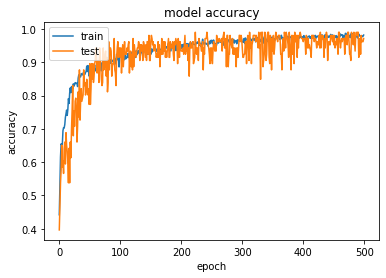

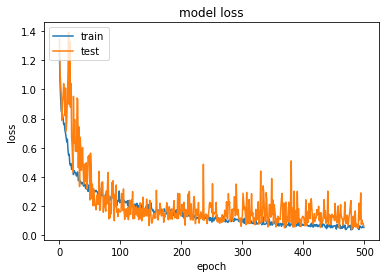

In [13]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [14]:
from tensorflow.keras.preprocessing import image
import numpy as np
IMAGE_SIZE =(150,150)

def predict_it(image_location):
  test_image=image.load_img(image_location, target_size = IMAGE_SIZE)
  plt.imshow(test_image)
  test_image=image.img_to_array(test_image)
  test_image=test_image/255
  test_image = np.expand_dims(test_image, axis = 0)
  preds=np.argmax(model.predict(test_image))
  if preds==0:
    print("The leaf is diseased cotton leaf")
  elif preds==1:
    print("The leaf is diseased cotton plant")
  elif preds==2:
    print("The leaf is fresh cotton leaf")
  else:
    print("The leaf is fresh cotton plant")

The leaf is diseased cotton leaf


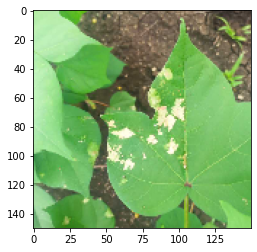

In [15]:
predict_it('../input/cotton-disease-dataset/Cotton Disease/val/diseased cotton leaf/dis_leaf (100)_iaip.jpg')

The leaf is diseased cotton plant


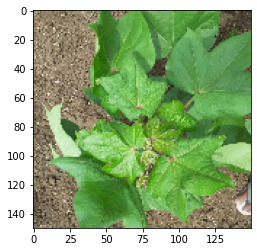

In [16]:
predict_it('../input/cotton-disease-dataset/Cotton Disease/val/diseased cotton plant/dd (10)_iaip.jpg')

The leaf is fresh cotton leaf


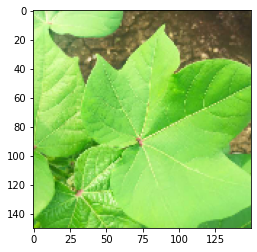

In [17]:
predict_it('../input/cotton-disease-dataset/Cotton Disease/val/fresh cotton leaf/d (106)_iaip.jpg')

The leaf is fresh cotton plant


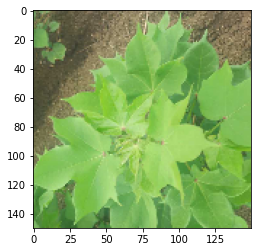

In [18]:
predict_it('../input/cotton-disease-dataset/Cotton Disease/val/fresh cotton plant/dsd (141)_iaip.jpg')

In [19]:
validation_path = '../input/cotton-disease-dataset/Cotton Disease/val'

In [20]:
valid_data = test_datagen.flow_from_directory(validation_path, target_size=(150, 150), 
                                      batch_size=32,
                                      class_mode='categorical')

Found 253 images belonging to 4 classes.


In [21]:
predicted = model.predict(valid_data[0][0])

In [22]:
actual=[]
for i in valid_data[0][1]:
  actual.append(np.argmax(i))
predict=[]
for i in predicted:
  predict.append(np.argmax(i))

In [23]:
from sklearn.metrics import accuracy_score
accuracy_score(actual,predict)

0.96875